In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('walmart_data.csv')

In [3]:
data.shape

(550068, 10)

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### Checking for data types

In [5]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

#### Checking for Missing values

In [6]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [9]:
data.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [10]:
data['User_ID'] = data['User_ID'].astype('object')
data['Product_Category'] = data['Product_Category'].astype('object')
data['Marital_Status'] = data['Marital_Status'].astype('object')
data['Occupation'] = data['Occupation'].astype('object')

In [11]:
data.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [12]:
data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [13]:
data.describe(include='object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [21]:
data['User_ID'].nunique()

5891

In [22]:
data['Product_ID'].nunique()

3631

Observation:
- There are no missing values
- There are 5891 unique users
- There are 3631 unique products

## Univariate Analysis

### Continuous Variables

In [12]:
# Calculate the number of bins using Sturges' rule
N = 550068  # Total number of purchases
bins_sturges = int(np.log2(N) + 1)
bins_sqrt = int(np.sqrt(N))

C:\Users\maroj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


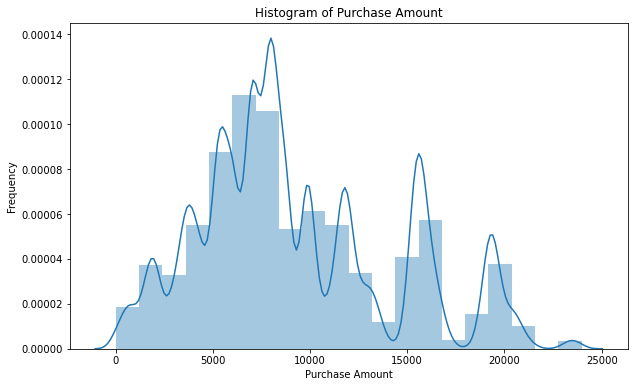

In [13]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Purchase'], bins=bins_sturges, kde=True)
plt.title('Histogram of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\maroj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


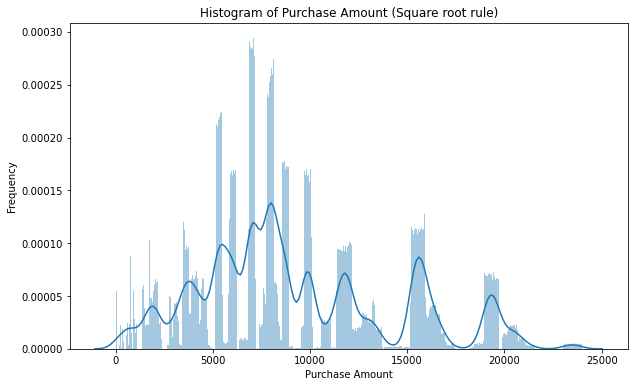

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Purchase'], bins=bins_sqrt, kde=True)
plt.title('Histogram of Purchase Amount (Square root rule)')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

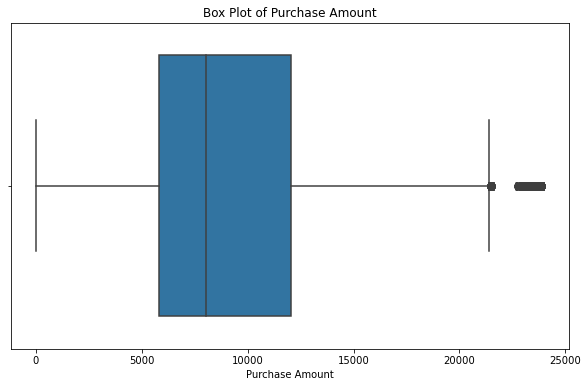

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Purchase'])
plt.title('Box Plot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

In [16]:
# Calculate the 5th and 95th percentiles
p5 = data['Purchase'].quantile(0.05)
p95 = data['Purchase'].quantile(0.95)

In [17]:
# Clip the Purchase column between the 5th and 95th percentiles
data['Purchase_clipped'] = np.clip(data['Purchase'], p5, p95)

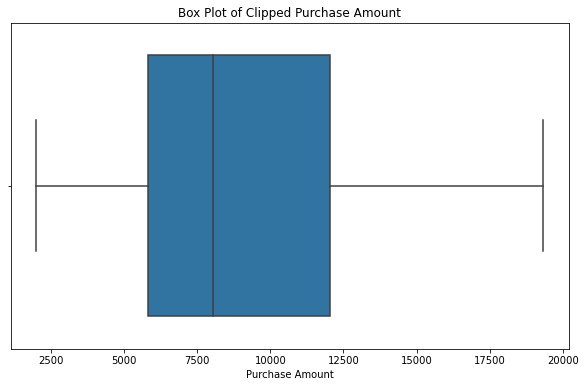

In [18]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Purchase_clipped'])
plt.title('Box Plot of Clipped Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()

### Categorical Variables

#### Gender

In [14]:
data['Gender'].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [19]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

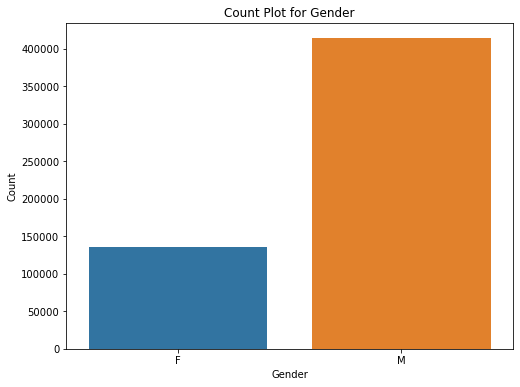

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Count Plot for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Age

In [15]:
data['Age'].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [21]:
data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

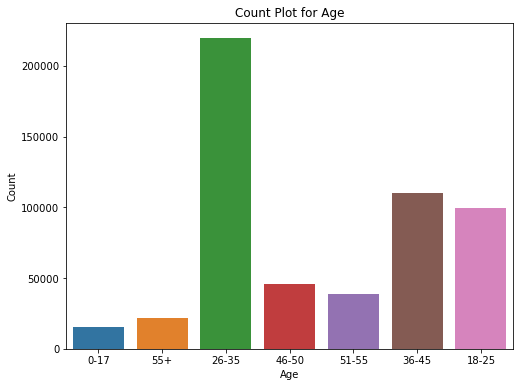

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age', data=data)
plt.title('Count Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Occupation

In [16]:
data['Occupation'].value_counts(normalize=True)

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

In [23]:
data['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

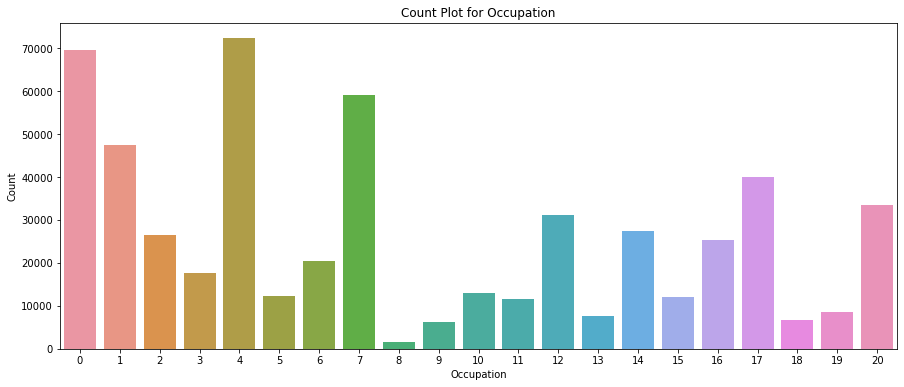

In [24]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Occupation', data=data)
plt.title('Count Plot for Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

#### City_Category

In [17]:
data['City_Category'].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [25]:
data['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

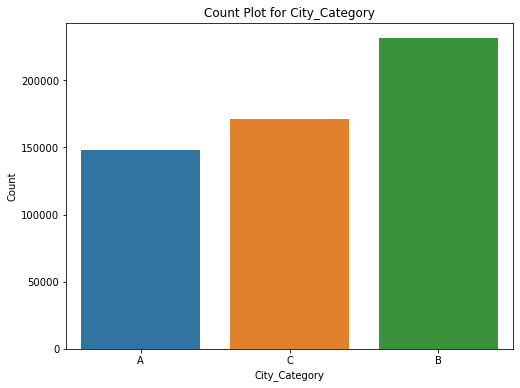

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='City_Category', data=data)
plt.title('Count Plot for City_Category')
plt.xlabel('City_Category')
plt.ylabel('Count')
plt.show()

#### Stay_In_Current_City_Years

In [18]:
data['Stay_In_Current_City_Years'].value_counts(normalize=True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

In [27]:
data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

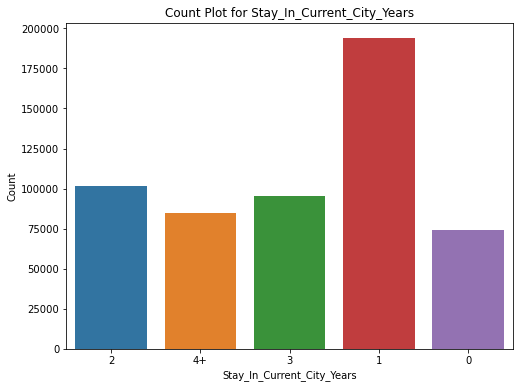

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stay_In_Current_City_Years', data=data)
plt.title('Count Plot for Stay_In_Current_City_Years')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.show()

#### Marital_Status

In [19]:
data['Marital_Status'].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [29]:
data['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

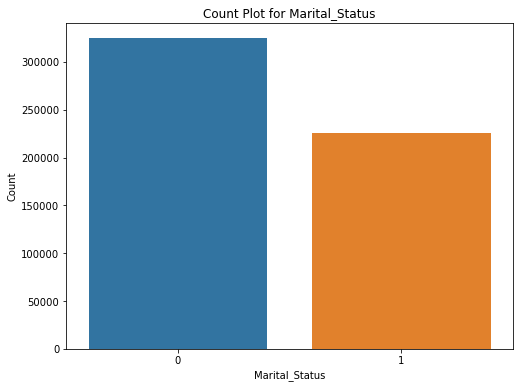

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=data)
plt.title('Count Plot for Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.show()

#### Product_Category

In [20]:
data['Product_Category'].value_counts(normalize=True)

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category, dtype: float64

In [31]:
data['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

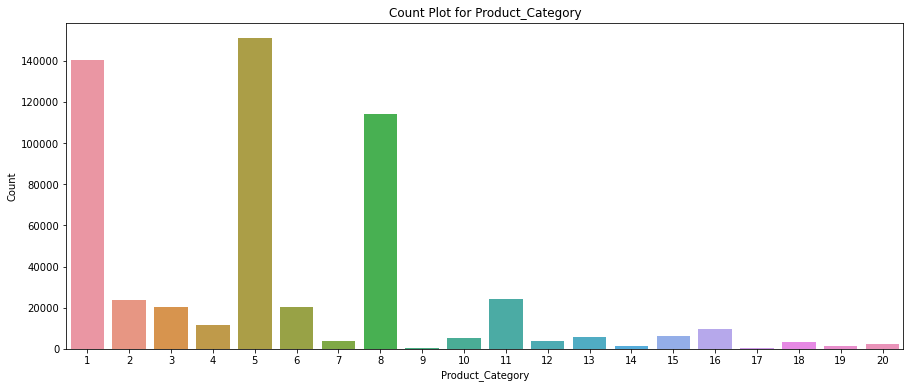

In [32]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Product_Category', data=data)
plt.title('Count Plot for Product_Category')
plt.xlabel('Product_Category')
plt.ylabel('Count')
plt.show()

#### Observations
- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are **`Male`** and 25% are **`Female`**
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 differnent types of occupations in the city
- Most of the users are `Male`
- There are 20 different types of `Occupation` and `Product_Category`
- More users belong to `B` `City_Category`
- More users are `Single` as compare to `Married`
- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

## Bivariate Analysis

### Gender vs Purchase

In [33]:
# Calculate the average purchase amount for each gender
avg_purchase_by_gender = data.groupby('Gender')['Purchase'].mean().reset_index()

In [34]:
avg_purchase_by_gender = avg_purchase_by_gender.sort_values(by='Purchase', ascending=False)
avg_purchase_by_gender

,Gender,Purchase
1,M,9437.526040
0,F,8734.565765


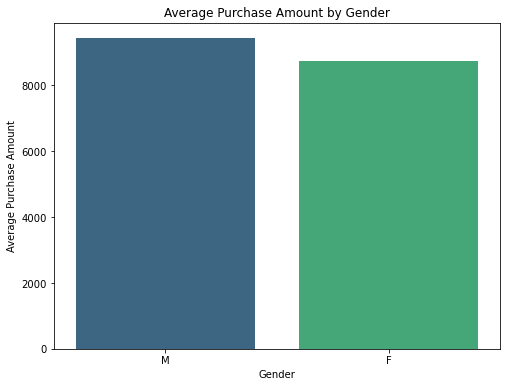

In [35]:
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase', data=avg_purchase_by_gender, palette='viridis')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

### Gender and Product Category

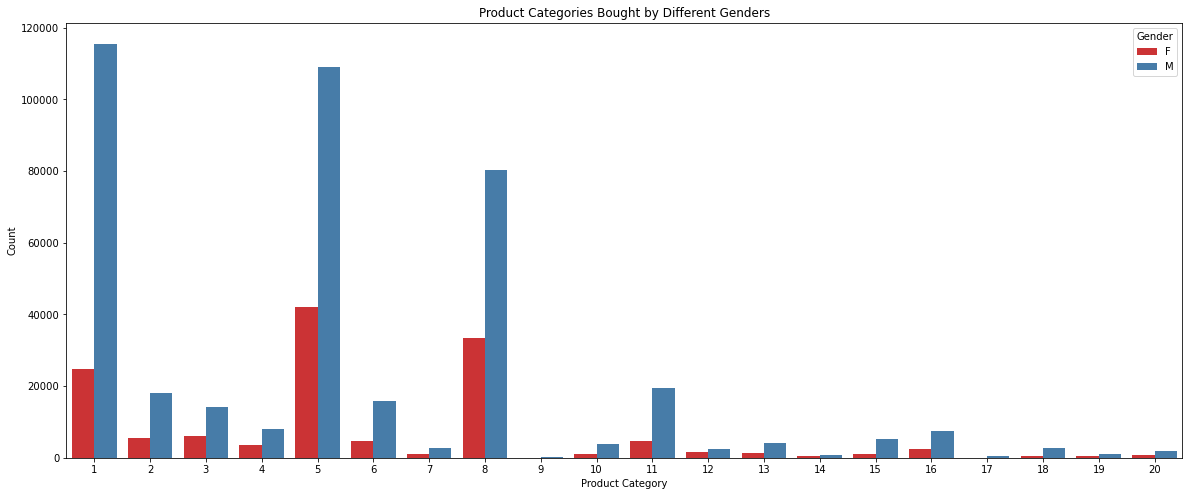

In [36]:
# Plot count plot for product categories and gender
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Product_Category', hue='Gender', palette='Set1')
plt.title('Product Categories Bought by Different Genders')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

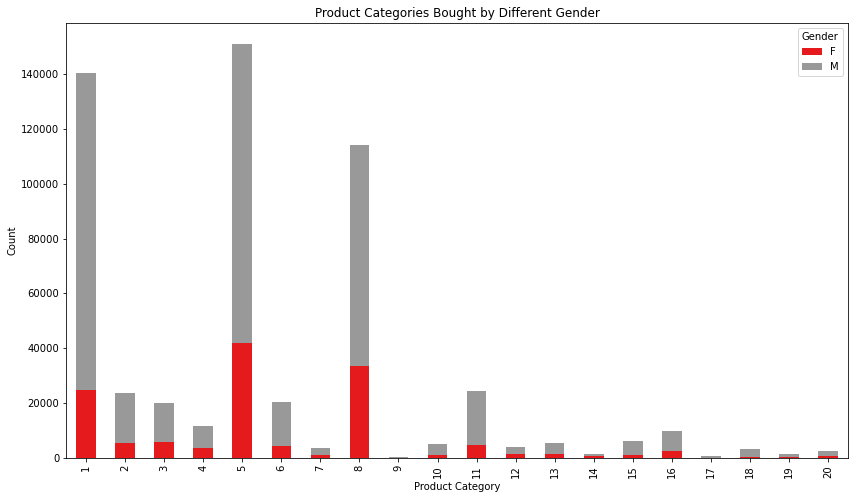

In [37]:
# Get the count of each product category for each gender
product_gender_counts = data.groupby(['Product_Category', 'Gender']).size().unstack(fill_value=0)

# Plot the stacked bar chart
product_gender_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set1')
plt.title('Product Categories Bought by Different Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [38]:
# Create a pivot table to show the count of each product category for each Gender
product_gender_counts = data.pivot_table(index='Product_Category', columns='Gender', aggfunc='size', fill_value=0)
product_gender_counts

Gender,F,M
Product_Category,,
1,24831,115547
2,5658,18206
3,6006,14207
4,3639,8114
5,41961,108972
6,4559,15907
7,943,2778
8,33558,80367
9,70,340


#### Top 5 products by Gender

In [39]:
top_5_products = data['Product_Category'].value_counts().head(5).index
filtered_df = data[data['Product_Category'].isin(top_5_products)]

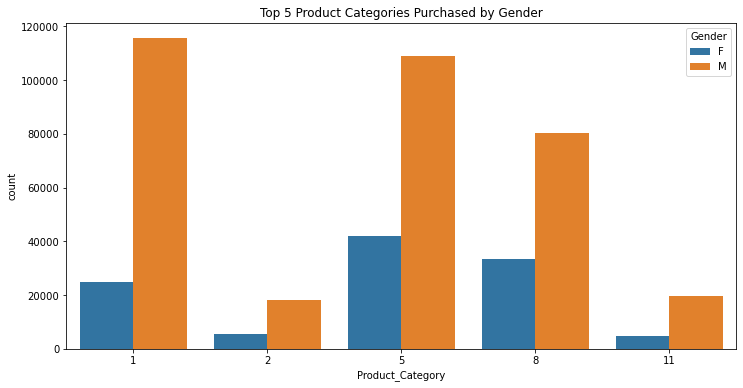

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Product_Category', hue='Gender')
plt.title('Top 5 Product Categories Purchased by Gender')
plt.show()

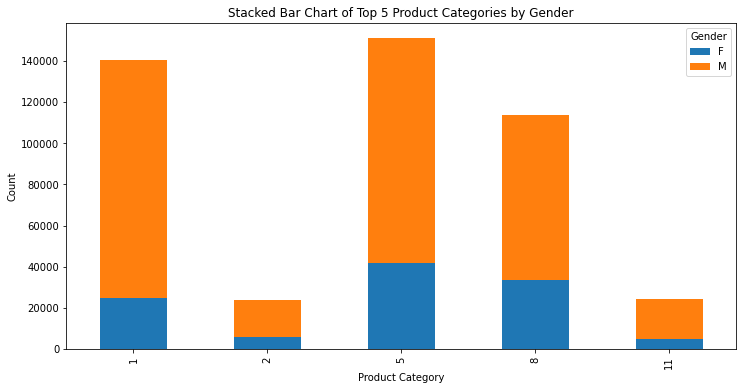

In [41]:
top_5_counts_gender = filtered_df.pivot_table(index='Product_Category', columns='Gender', aggfunc='size', fill_value=0)
top_5_counts_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart of Top 5 Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

In [42]:
top_5_counts_gender

Gender,F,M
Product_Category,,
1,24831,115547
2,5658,18206
5,41961,108972
8,33558,80367
11,4739,19548


### Age vs Purchase Amount

In [43]:
# Calculate the average purchase amount for each age group
avg_purchase_by_age = data.groupby('Age')['Purchase'].mean().reset_index()

In [44]:
avg_purchase_by_age = avg_purchase_by_age.sort_values(by='Purchase', ascending=False)
avg_purchase_by_age

,Age,Purchase
5,51-55,9534.808031
6,55+,9336.280459
3,36-45,9331.350695
2,26-35,9252.690633
4,46-50,9208.625697
1,18-25,9169.663606
0,0-17,8933.464640


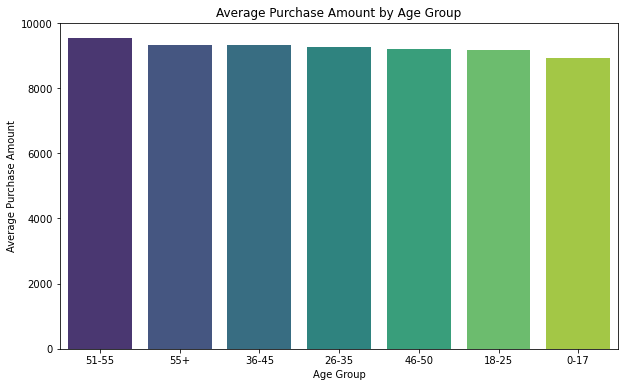

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=avg_purchase_by_age, palette='viridis')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.show()

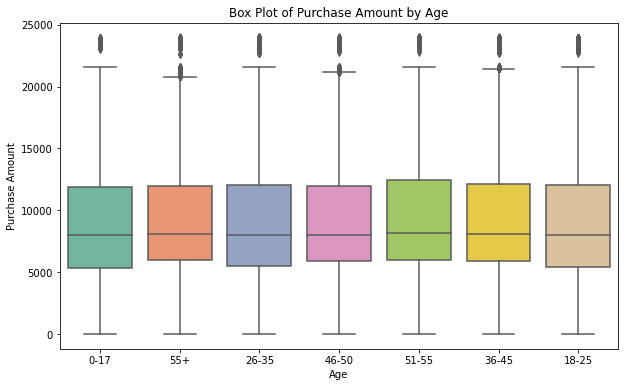

In [46]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=data, palette='Set2')
plt.title('Box Plot of Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

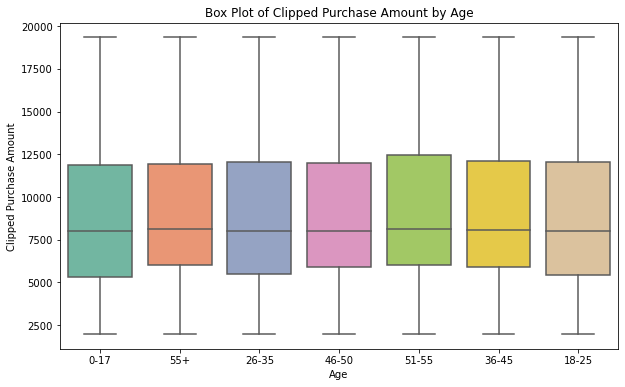

In [47]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase_clipped', data=data, palette='Set2')
plt.title('Box Plot of Clipped Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Clipped Purchase Amount')
plt.show()

### Age and Product Category

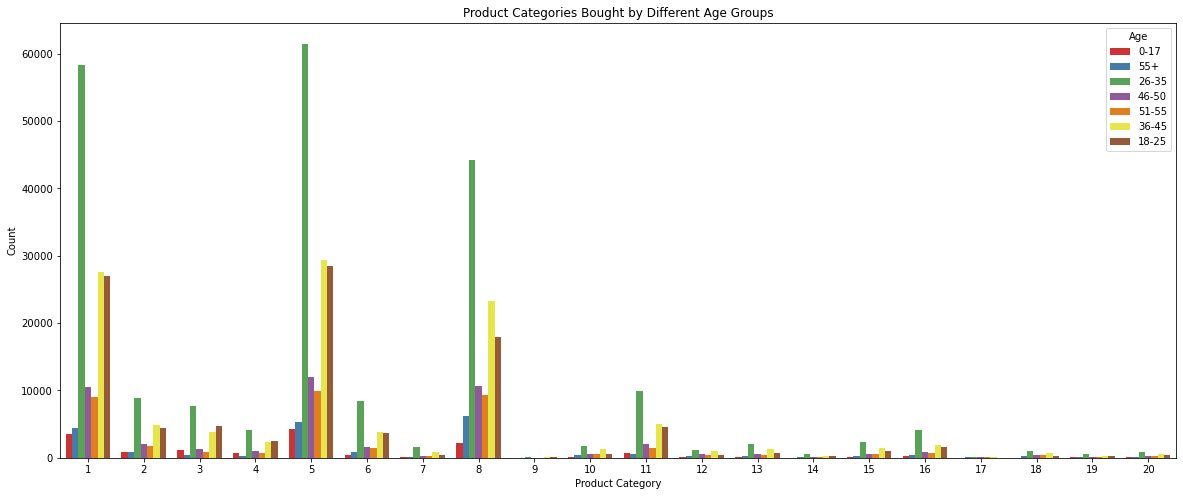

In [48]:
# Plot count plot for product categories and age groups
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Product_Category', hue='Age', palette='Set1')
plt.title('Product Categories Bought by Different Age Groups')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

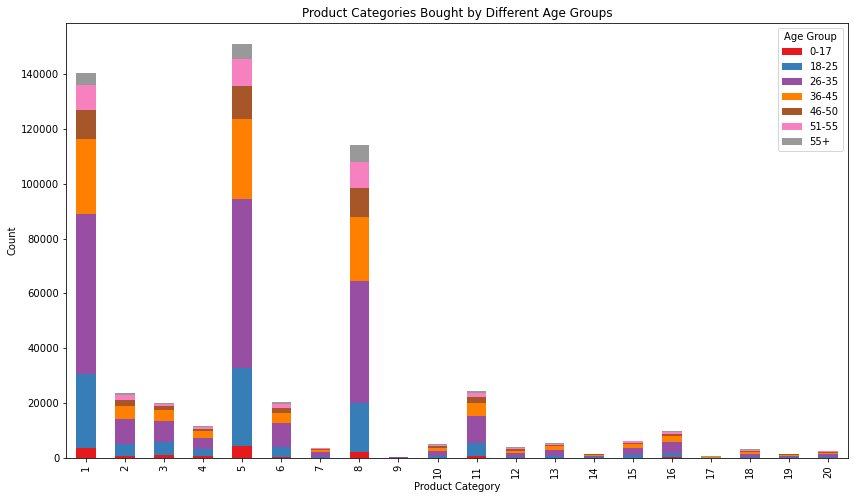

In [49]:
# Get the count of each product category for each age group
product_age_counts = data.groupby(['Product_Category', 'Age']).size().unstack(fill_value=0)

# Plot the stacked bar chart
product_age_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set1')
plt.title('Product Categories Bought by Different Age Groups')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

In [50]:
# Create a pivot table to show the count of each product category for each age group
product_age_counts = data.pivot_table(index='Product_Category', columns='Age', aggfunc='size', fill_value=0)
product_age_counts

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,3585,26962,58249,27648,10474,9049,4411
2,805,4428,8928,4912,2105,1781,905
3,1200,4710,7662,3854,1376,924,487
4,758,2463,4192,2354,990,678,318
5,4330,28522,61473,29377,11971,9893,5367
6,399,3749,8485,3899,1622,1450,862
7,53,481,1651,809,327,266,134
8,2258,17911,44256,23296,10656,9340,6208
9,16,63,154,107,33,29,8


#### Top 5 products by Age

In [51]:
top_5_products = data['Product_Category'].value_counts().head(5).index
filtered_df = data[data['Product_Category'].isin(top_5_products)]

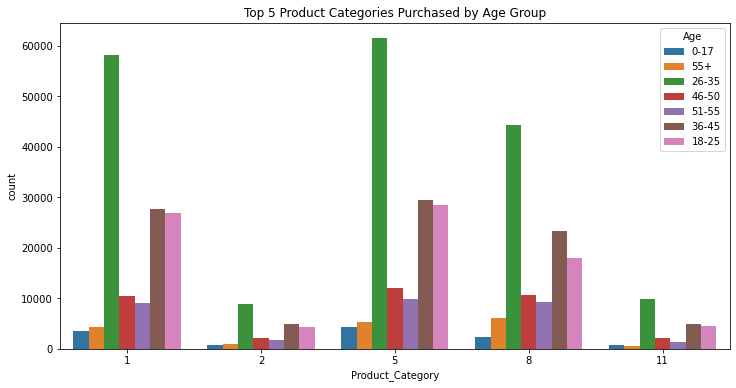

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Product_Category', hue='Age')
plt.title('Top 5 Product Categories Purchased by Age Group')
plt.show()

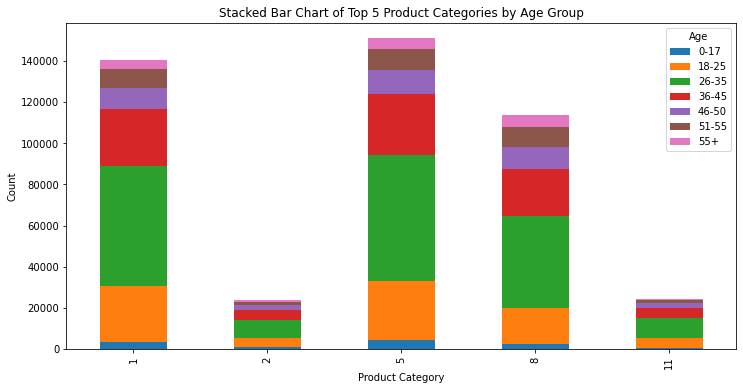

In [53]:
top_5_counts_age = filtered_df.pivot_table(index='Product_Category', columns='Age', aggfunc='size', fill_value=0)
top_5_counts_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart of Top 5 Product Categories by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

In [54]:
top_5_counts_age

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,3585,26962,58249,27648,10474,9049,4411
2,805,4428,8928,4912,2105,1781,905
5,4330,28522,61473,29377,11971,9893,5367
8,2258,17911,44256,23296,10656,9340,6208
11,740,4597,9874,4953,2104,1458,561


### City Category vs Purchase Amount

In [55]:
# Calculate the average purchase amount for each city category
avg_purchase_by_City_Category = data.groupby('City_Category')['Purchase'].mean().reset_index()

In [56]:
avg_purchase_by_City_Category = avg_purchase_by_City_Category.sort_values(by='Purchase', ascending=False)
avg_purchase_by_City_Category

,City_Category,Purchase
2,C,9719.920993
1,B,9151.300563
0,A,8911.939216


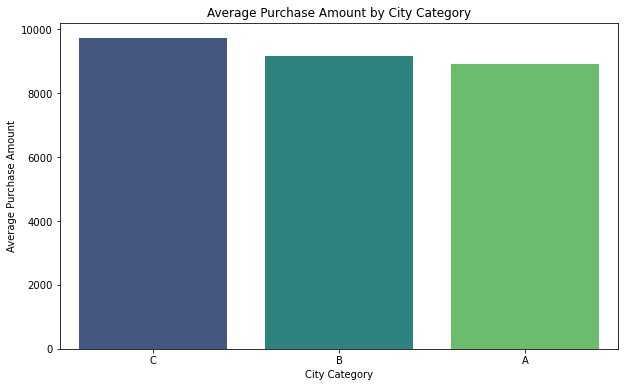

In [57]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='City_Category', y='Purchase', data=avg_purchase_by_City_Category, palette='viridis')
plt.title('Average Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.show()

### Occupation vs Average Purchase Amount

In [58]:
# Calculate the average purchase amount for each occupation
avg_purchase_by_occupation = data.groupby('Occupation')['Purchase'].mean().reset_index()

In [59]:
avg_purchase_by_occupation = avg_purchase_by_occupation.sort_values(by='Purchase', ascending=False)
avg_purchase_by_occupation

,Occupation,Purchase
17,17,9821.478236
12,12,9796.640239
15,15,9778.891163
8,8,9532.592497
14,14,9500.702772
7,7,9425.728223
16,16,9394.464349
5,5,9333.149298
13,13,9306.351061
6,6,9256.535691


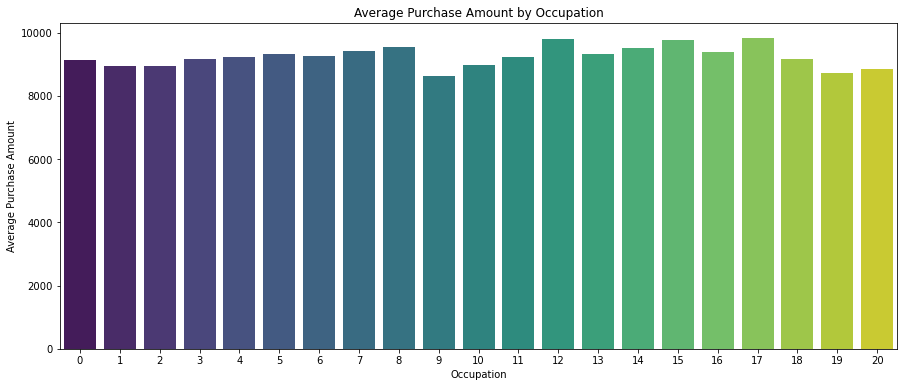

In [60]:
# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x='Occupation', y='Purchase', data=avg_purchase_by_occupation, palette='viridis')
plt.title('Average Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Purchase Amount')
plt.show()

### Current City Years vs Purchase Amount

In [61]:
# Calculate the average purchase amount for each ccy
avg_purchase_by_ccy = data.groupby('Stay_In_Current_City_Years')['Purchase'].mean().reset_index()

In [62]:
avg_purchase_by_ccy = avg_purchase_by_ccy.sort_values(by='Purchase', ascending=False)
avg_purchase_by_ccy

,Stay_In_Current_City_Years,Purchase
2,2,9320.429810
3,3,9286.904119
4,4+,9275.598872
1,1,9250.145923
0,0,9180.075123


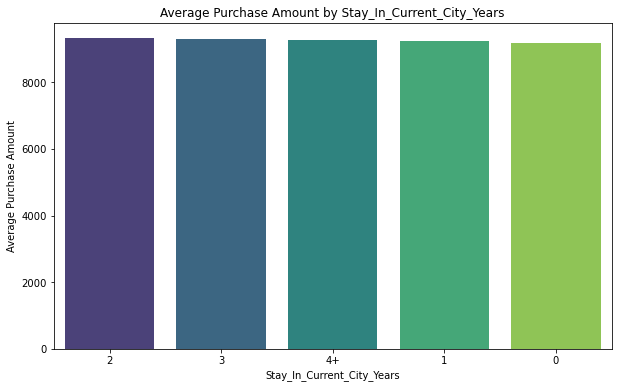

In [63]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=avg_purchase_by_ccy, palette='viridis')
plt.title('Average Purchase Amount by Stay_In_Current_City_Years')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Average Purchase Amount')
plt.show()

### Marital Status vs Purchase Amount

In [64]:
# Calculate the average purchase amount by marital status
avg_purchase_by_ms = data.groupby('Marital_Status')['Purchase'].mean().reset_index()

In [65]:
avg_purchase_by_ms = avg_purchase_by_ms.sort_values(by='Purchase', ascending=False)
avg_purchase_by_ms

,Marital_Status,Purchase
0,0,9265.907619
1,1,9261.174574


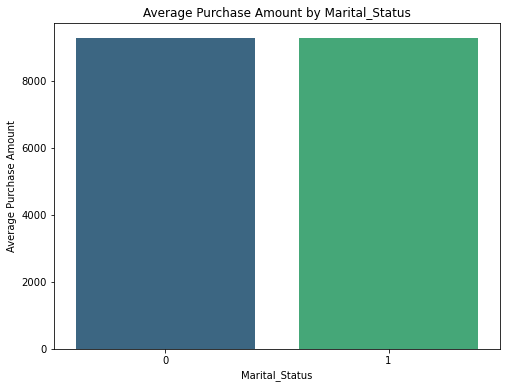

In [66]:
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_Status', y='Purchase', data=avg_purchase_by_ms, palette='viridis')
plt.title('Average Purchase Amount by Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Average Purchase Amount')
plt.show()

### Product Category vs Purchase Amount

In [67]:
# Calculate the average purchase amount by Product Category
avg_purchase_by_Product_Category = data.groupby('Product_Category')['Purchase'].mean().reset_index()

In [68]:
avg_purchase_by_Product_Category = avg_purchase_by_Product_Category.sort_values(by='Purchase', ascending=False)
avg_purchase_by_Product_Category

,Product_Category,Purchase
9,10,19675.570927
6,7,16365.689600
5,6,15838.478550
8,9,15537.375610
14,15,14780.451828
15,16,14766.037037
0,1,13606.218596
13,14,13141.625739
1,2,11251.935384
16,17,10170.759516


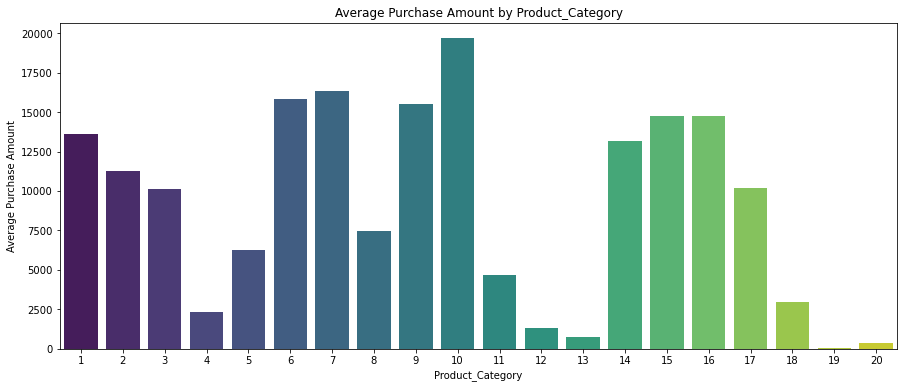

In [69]:
# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x='Product_Category', y='Purchase', data=avg_purchase_by_Product_Category, palette='viridis')
plt.title('Average Purchase Amount by Product_Category')
plt.xlabel('Product_Category')
plt.ylabel('Average Purchase Amount')
plt.show()

#### Observations
- Average amount spent by males are more than females
- People of Age group **`51-55`** spend the most, followed my **`55+`** and **`36-45`**
- `City C` purchsed the most followed by `City B` and `City A`
- Top 3 occupations with highest average purchase amount are `17`, `12` and `15`
- People who stayed in the City for more than a year spend the most
- The average purchase amount of married and unmarried people are similar
- Product category `10` had the highest amount spent, followed by `7`, `6` and `9`

## Multivariate Analysis

### Relationship between Age, Marital Status and Purchase

<Figure size 1008x576 with 0 Axes>

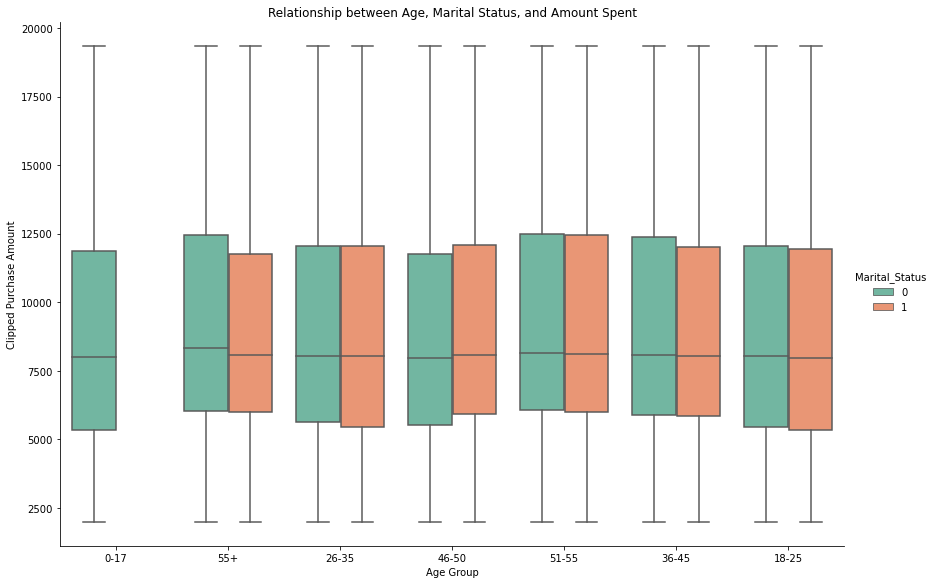

In [70]:
# Create a catplot for age, marital status, and purchase amount
plt.figure(figsize=(14, 8))
sns.catplot(x='Age', y='Purchase_clipped', hue='Marital_Status', kind='box', data=data, palette='Set2', height=8, aspect=1.5)
plt.title('Relationship between Age, Marital Status, and Amount Spent')
plt.xlabel('Age Group')
plt.ylabel('Clipped Purchase Amount')
plt.show()

In [71]:
# Create a pivot table to show the average purchase amount by age and marital status
pivot_table = data.pivot_table(values='Purchase', index='Age', columns='Marital_Status', aggfunc='mean')

# Rename the columns for better understanding
pivot_table.columns = ['Single', 'Married']

# Display the pivot table
pivot_table

,Single,Married
Age,,
0-17,8933.464640,NaN
18-25,9216.752419,8994.509992
26-35,9252.566484,9252.882410
36-45,9402.515329,9223.098451
46-50,8956.529551,9305.535821
51-55,9575.827475,9518.735088
55+,9539.774959,9218.510315


### Relationship between Age, Product Category and Purchase

In [72]:
# Create a pivot table to show the average purchase amount by age and product category
pivot_table_app = data.pivot_table(values='Purchase', index='Product_Category', columns='Age', aggfunc='mean')
pivot_table_app

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,13607.600279,13448.852904,13456.256056,13767.068287,13778.098148,14125.773014,14065.121741
2,10851.982609,10966.741870,11083.914427,11375.946254,11479.071734,11901.649635,12180.648619
3,9431.505000,9871.727601,10154.785043,10340.294240,10261.654797,10327.424242,10166.398357
4,2244.659631,2194.358912,2340.182729,2400.508496,2420.013131,2445.980826,2387.732704
5,6249.356120,6142.584040,6176.736014,6283.077612,6372.036672,6502.194885,6463.649339
6,15982.842105,15768.623900,15758.713848,15803.359323,15916.663379,16227.108276,16218.627610
7,15490.830189,16062.850312,16341.205330,16450.993820,16619.957187,16376.913534,16942.664179
8,7632.767493,7387.642287,7400.653900,7528.592033,7532.639452,7772.095824,7892.292043
9,15434.875000,17127.650794,15673.753247,14689.448598,14759.393939,14576.689655,18626.375000


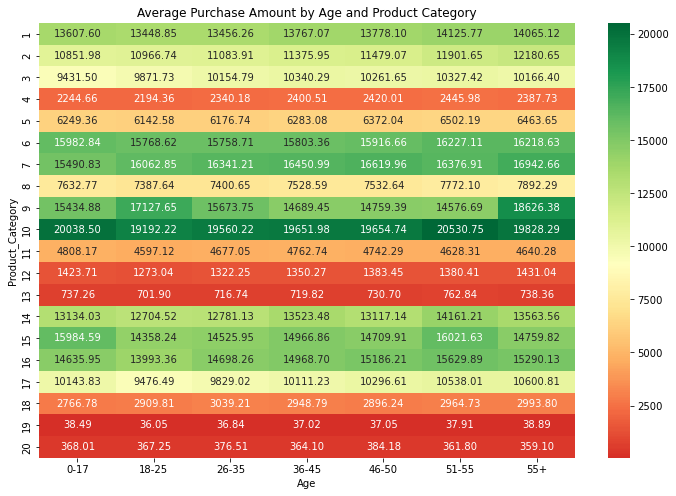

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_app, annot=True, fmt=".2f", cmap="RdYlGn", center=pivot_table_app.values.mean())
plt.title('Average Purchase Amount by Age and Product Category')
plt.show()

### Relationship between Gender, Product Category and Purchase

In [74]:
# Create a pivot table to show the average purchase amount by age and product category
pivot_table_gpp = data.pivot_table(values='Purchase', index='Product_Category', columns='Gender', aggfunc='mean')
pivot_table_gpp

Gender,F,M
Product_Category,,
1,13597.162619,13608.164721
2,11407.496819,11203.590520
3,10262.656677,10026.550081
4,2454.851882,2273.512694
5,6307.239532,6214.230729
6,15596.428164,15907.851009
7,16394.853659,16355.789777
8,7499.924787,7498.554419
9,15724.314286,15498.888235


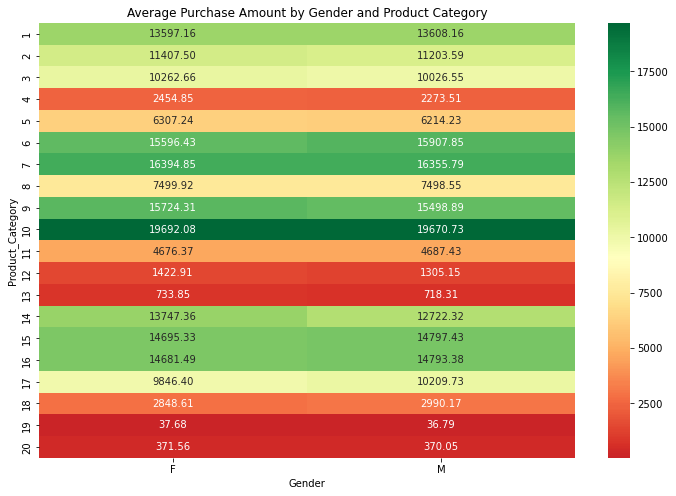

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_gpp, annot=True, fmt=".2f", cmap="RdYlGn", center=pivot_table_gpp.values.mean())
plt.title('Average Purchase Amount by Gender and Product Category')
plt.show()

### How does Gender Affect the amount spent?

In [76]:
from scipy.stats import norm

In [77]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_clipped
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1984.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1984.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7969.0


In [78]:
# Function to compute the confidence interval
def compute_confidence_interval(df, confidence=0.95):
    n = len(df)
    mean = np.mean(df)
    std_err = np.std(df, ddof=1) / np.sqrt(n)  # Corrected here
    margin_of_error = std_err * norm.ppf((1 + confidence) / 2)
    return mean, mean - margin_of_error, mean + margin_of_error

In [79]:
# Function for bootstrapping confidence intervals
def bootstrap_confidence_interval(df, sample_size, n_bootstrap=1000, confidence=0.95):
    bootstrapped_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(df, size=sample_size, replace=True)
        bootstrapped_means.append(np.mean(sample))
    mean = np.mean(bootstrapped_means)
    margin_of_error = np.std(bootstrapped_means) * norm.ppf((1 + confidence) / 2)
    return mean, mean - margin_of_error, mean + margin_of_error

In [80]:
# Compute confidence intervals for the entire data
genders = data['Gender'].unique()
for gender in genders:
    gender_df = data[data['Gender'] == gender]['Purchase'].to_numpy()  # Convert to NumPy array
    mean, lower, upper = compute_confidence_interval(gender_df)
    print(f'Entire data - Gender: {gender}, Mean: {mean:.2f}, 95% CI: [{lower:.2f}, {upper:.2f}]')

Entire data - Gender: F, Mean: 8734.57, 95% CI: [8709.21, 8759.92]
Entire data - Gender: M, Mean: 9437.53, 95% CI: [9422.02, 9453.03]


In [81]:
# Sample sizes
sample_sizes = [300, 3000, 30000]
for sample_size in sample_sizes:
    for gender in genders:
        gender_df = data[data['Gender'] == gender]['Purchase'].to_numpy()  # Convert to NumPy array
        mean, lower, upper = bootstrap_confidence_interval(gender_df, sample_size)
        print(f'Sample size {sample_size} - Gender: {gender}, Mean: {mean:.2f}, 95% CI: [{lower:.2f}, {upper:.2f}]')

Sample size 300 - Gender: F, Mean: 8737.14, 95% CI: [8175.35, 9298.94]
Sample size 300 - Gender: M, Mean: 9430.77, 95% CI: [8869.89, 9991.66]
Sample size 3000 - Gender: F, Mean: 8738.42, 95% CI: [8564.85, 8912.00]
Sample size 3000 - Gender: M, Mean: 9437.05, 95% CI: [9255.78, 9618.31]
Sample size 30000 - Gender: F, Mean: 8735.31, 95% CI: [8681.02, 8789.61]
Sample size 30000 - Gender: M, Mean: 9435.53, 95% CI: [9377.79, 9493.27]


### How does Marital Status Affect the amount spent?

In [82]:
marital_statuses = data['Marital_Status'].unique()
for status in marital_statuses:
    status_df = data[data['Marital_Status'] == status]['Purchase'].to_numpy()
    mean, lower, upper = compute_confidence_interval(status_df)
    print(f'Entire data - Marital Status: {status}, Mean: {mean:.2f}, 95% CI: [{lower:.2f}, {upper:.2f}]')

Entire data - Marital Status: 0, Mean: 9265.91, 95% CI: [9248.62, 9283.20]
Entire data - Marital Status: 1, Mean: 9261.17, 95% CI: [9240.46, 9281.89]


In [83]:
# Sample sizes
sample_sizes = [300, 3000, 30000]
for sample_size in sample_sizes:
    for status in marital_statuses:
        status_df = data[data['Marital_Status'] == status]['Purchase'].to_numpy()
        mean, lower, upper = bootstrap_confidence_interval(status_df, sample_size)
        print(f'Sample size {sample_size} - Marital Status: {status}, Mean: {mean:.2f}, 95% CI: [{lower:.2f}, {upper:.2f}]')

Sample size 300 - Marital Status: 0, Mean: 9258.98, 95% CI: [8680.45, 9837.51]
Sample size 300 - Marital Status: 1, Mean: 9254.64, 95% CI: [8684.09, 9825.19]
Sample size 3000 - Marital Status: 0, Mean: 9263.17, 95% CI: [9077.71, 9448.63]
Sample size 3000 - Marital Status: 1, Mean: 9260.98, 95% CI: [9080.81, 9441.15]
Sample size 30000 - Marital Status: 0, Mean: 9266.14, 95% CI: [9208.10, 9324.18]
Sample size 30000 - Marital Status: 1, Mean: 9261.71, 95% CI: [9203.81, 9319.61]


### How does Age Affect the amount spent?

In [84]:
# Compute confidence intervals for the entire data
age_groups = data['Age'].unique()
for age_group in age_groups:
    age_group_df = data[data['Age'] == age_group]['Purchase'].to_numpy()
    mean, lower, upper = compute_confidence_interval(age_group_df)
    print(f'Entire data - Age group: {age_group}, Mean: {mean:.2f}, 95% CI: [{lower:.2f}, {upper:.2f}]')

Entire data - Age group: 0-17, Mean: 8933.46, 95% CI: [8851.95, 9014.98]
Entire data - Age group: 55+, Mean: 9336.28, 95% CI: [9269.30, 9403.26]
Entire data - Age group: 26-35, Mean: 9252.69, 95% CI: [9231.73, 9273.65]
Entire data - Age group: 46-50, Mean: 9208.63, 95% CI: [9163.09, 9254.17]
Entire data - Age group: 51-55, Mean: 9534.81, 95% CI: [9483.99, 9585.62]
Entire data - Age group: 36-45, Mean: 9331.35, 95% CI: [9301.67, 9361.03]
Entire data - Age group: 18-25, Mean: 9169.66, 95% CI: [9138.41, 9200.92]


In [85]:
# Sample sizes
sample_sizes = [300, 3000, 30000]
for sample_size in sample_sizes:
    for age_group in age_groups:
        age_group_df = data[data['Age'] == age_group]['Purchase'].to_numpy()
        mean, lower, upper = bootstrap_confidence_interval(age_group_df, sample_size)
        print(f'Sample size {sample_size} - Age group: {age_group}, Mean: {mean:.2f}, 95% CI: [{lower:.2f}, {upper:.2f}]')

Sample size 300 - Age group: 0-17, Mean: 8936.67, 95% CI: [8351.55, 9521.79]
Sample size 300 - Age group: 55+, Mean: 9351.40, 95% CI: [8786.26, 9916.53]
Sample size 300 - Age group: 26-35, Mean: 9279.13, 95% CI: [8722.53, 9835.73]
Sample size 300 - Age group: 46-50, Mean: 9202.76, 95% CI: [8651.84, 9753.68]
Sample size 300 - Age group: 51-55, Mean: 9522.20, 95% CI: [8947.05, 10097.36]
Sample size 300 - Age group: 36-45, Mean: 9326.66, 95% CI: [8758.46, 9894.87]
Sample size 300 - Age group: 18-25, Mean: 9172.75, 95% CI: [8578.32, 9767.19]
Sample size 3000 - Age group: 0-17, Mean: 8936.30, 95% CI: [8742.30, 9130.31]
Sample size 3000 - Age group: 55+, Mean: 9334.19, 95% CI: [9156.83, 9511.54]
Sample size 3000 - Age group: 26-35, Mean: 9253.72, 95% CI: [9076.37, 9431.08]
Sample size 3000 - Age group: 46-50, Mean: 9206.01, 95% CI: [9028.00, 9384.02]
Sample size 3000 - Age group: 51-55, Mean: 9536.49, 95% CI: [9358.52, 9714.45]
Sample size 3000 - Age group: 36-45, Mean: 9331.65, 95% CI: [914

# 📊 Insights 📊

## Age Distribution 🎂
- ~ 80% of the users are aged between 18-50:
    - 40%: 26-35 📅
    - 18%: 18-25 🎈
    - 20%: 36-45 🗓️
    
## Gender Ratio 👫
- 75% of the users are Male ♂️ and 25% are Female ♀️
    
## Marital Status 👩‍❤️‍👨
- 60% are Single 👤 and 40% are Married 👫
    
## City Residency 🏙️
- 35% have been staying in the city for 1 year 🏠
- 18% have been staying for 2 years 🏠🏠
- 17% have been staying for 3 years 🏠🏠🏠
    
## Product Categories 🛍️
- Total of 20 product categories available 📦
    
## Occupations 💼
- 20 different types of occupations in the city 👔

## User Demographics 📊
- Most users are Male ♂️
- 20 different types of Occupations and Product Categories 📋
- Majority of users belong to City Category B 🏙️
- More users are Single compared to Married 👤 vs 👫
- Product Categories 1, 2, 5, 8, & 11 have the highest purchasing frequency 🛒🔝

## Average Spending 💰
- Average amount spent by Male customers: ₹925,344.40 💸
- Average amount spent by Female customers: ₹712,024.39 💸

## Confidence Intervals 📈

## Gender-wise

Now using the **Central Limit Theorem** for the **population**:

1. Average amount spend by **male** customers is **9437.53**
2. Average amount spend by **female** customers is **8734.57**

For **99% Confidence Interval**: <br>
Now we can infer about the population that, **99% of the times**:

1. Average amount spend by male customer will lie in between: **(9436.27, 9438.79)**
2. Average amount spend by female customer will lie in between: **(8732.44, 8736.70)**


## Marital Status-wise

Now using the **Central Limit Theorem** for the **population**:

1. Average amount spend by **Married** customers is **9261.17**
2. Average amount spend by **Unmarried** customers is **9265.91**
  

For **80% Confidence Interval**: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
But the overlapping has significantly reduced.

Now we can infer about the population that, **80% of the times**:

1. Average amount spend by Married customer will lie in between: **(9234.07, 9288.27)**
2. Average amount spend by Unmarried customer will lie in between: **(9243.28, 9288.54)**

## Age-wise

For **90% Confidence Interval**: <br>

1. For **age 26-35** --> confidence interval of means: **(9217.50, 9287.88)**
2. For **age 36-45** --> confidence interval of means: **(9281.56, 9381.14)**
3. For **age 18-25** --> confidence interval of means: **(9117.22, 9222.10)**
4. For **age 46-50** --> confidence interval of means: **(9132.20, 9285.06)**
5. For **age 51-55** --> confidence interval of means: **(9449.57, 9619.05)**
6. For **age 55+** --> confidence interval of means: **(9223.81, 9448.75)**
7. For **age 0-17** --> confidence interval of means: **(8796.69, 9070.23)**

# 💡 Recommendations 💡
## 1) Gender-focused Strategy 🚹🚺
- Men tend to spend more than women. The company should prioritize retaining existing male customers and attracting new male customers.
    
## 2) Product Category Insight 🛍️
- Products in categories 1, 2, 5, 8, & 11 have the highest purchasing frequency and are favored by customers. The company can consider increasing the promotion and availability of these products, as well as boosting less-purchased items.
    
## 3) Marital Status Approach 💑
- Unmarried customers exhibit higher spending compared to married customers. The company should concentrate on attracting and engaging unmarried customers.
    
## 4) Targeting Specific Age Group 🎈
- Customers aged 18-45 contribute more to the spending. To enhance revenue, the company should focus on acquiring customers within this age range.
    
## 5) City Category Strategy 🏙️
- Male customers residing in City_Category C demonstrate higher spending compared to those in City_Category B or A. To increase revenue, the company should consider emphasizing product offerings in City_Category C.